# PBMC (Yale) 

https://datadryad.org/stash/dataset/doi:10.5061/dryad.4xgxd25g1

In [1]:
import scanpy as sc
import numpy as np
from ndreamer import NDreamer

In [2]:
adata = sc.read_h5ad('../data/PBMC_yale_preprocessed.h5ad')
print(adata)
print('perturbation',np.unique(adata.obs['perturbation'],return_counts=True))
print('batch',np.unique(adata.obs['batch'],return_counts=True))
print('cell_type0528',np.unique(adata.obs['cell_type0528']))
print(adata.X[:10,:10])

AnnData object with n_obs × n_vars = 5027 × 773
    obs: 'perturbation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'leiden', 'cell_type0528'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type0528_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'perturbation_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
perturbation (array(['IFNb', 'No stimulation'], dtype=object), array([2759, 2268]))
batch (array(['H3D2'], dtype=object), array([5027]))
cell_type0528 ['B' 'CD4 T' 'CD8 T' 'Dendritic' 'Monocyte' 'NK' 'Plasma']
[[-0.11865562 -0.17559336 -0.13184807 -0.15251128 -0.24557106 -0.38421327
  -0.2019245  -0.13745788 -0.23247382 -0.08626232]
 [-0.13325824 -0.20568384 -0.14286487 -0.16371657 -0.2607082  -0.2985558
  -0.20685168 -0.15235388 -0.23922235 -0.10109032]
 [-0.15649903  4.662776   -0.13260117

In [12]:
adata = adata[adata.obs['perturbation'].isin(['No stimulation','IFNb'])]
adata=adata[adata.obs['batch'].isin(['H3D2'])]
print(adata)
adata=adata.copy()
adata.write("../data/PBMC_yale_preprocessed.h5ad")

View of AnnData object with n_obs × n_vars = 5027 × 773
    obs: 'perturbation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'leiden', 'cell_type0528'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type0528_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'perturbation_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [13]:
print(np.unique(adata.obs['batch']))

['H3D2']


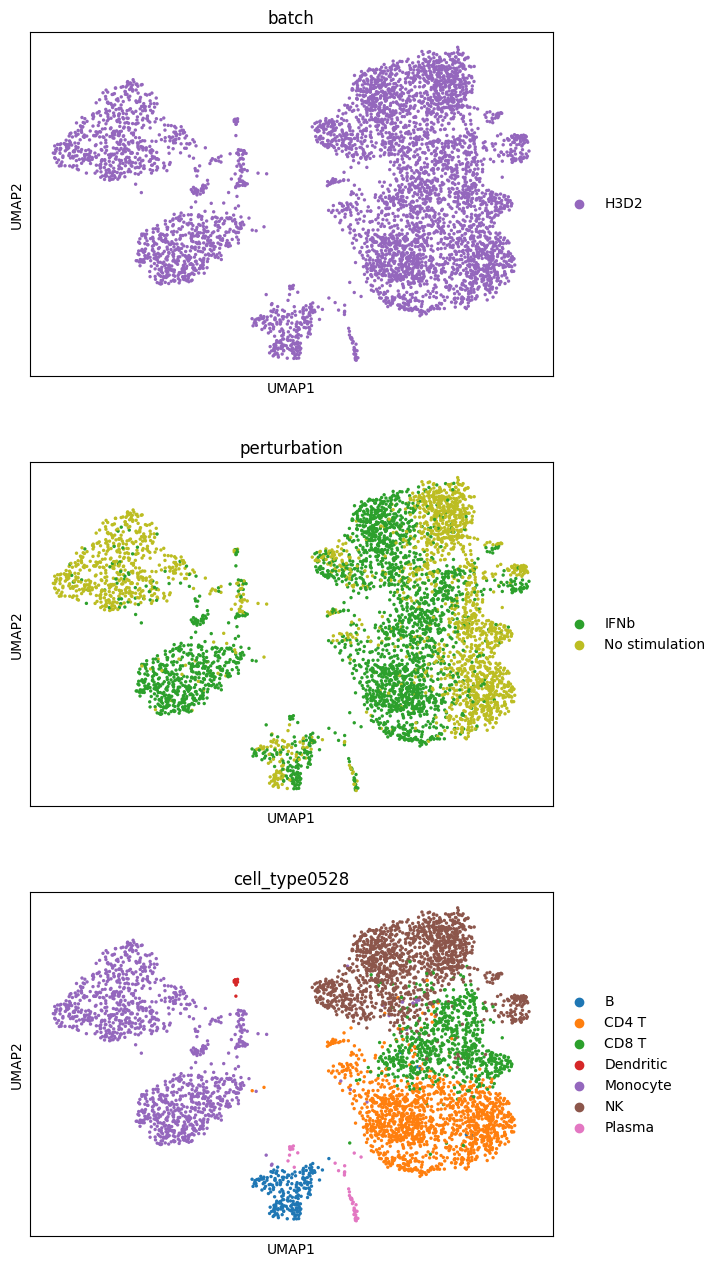

In [14]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata,color=['batch','perturbation','cell_type0528'],ncols=1)

In [15]:
model = NDreamer(adata, condition_key='perturbation', contorl_name='No stimulation', num_hvg=733, require_batch=True,
                            batch_key='batch',
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=100, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./PBMC_yale/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./PBMC_yale/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20, have_negative_data=True)

model.train_model()
model.get_modifier_space()

model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)

Start data preprocessing
Original adata.obs[batch] back up to adata.obs['batch_backup']
Original adata.obs[condition_key] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'No stimulation': 0, 'IFNb': 1}
Condition mapping to adata.obs['batch']: {'H3D2': 0}
Calculating the clusters
Unique groups: ['0_IFNb' '0_No stimulation']


/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/ndreamer/single_cell_utils.py:38: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  clustering_function(adata, resolution=resolution1)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/ndreamer/single_cell_utils.py:100: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will 

Finished clustering
Data preprocessing done
Remaining number of cells: 5027
Require batch: False
Batch name to number mapping (may be used for search for saved adata):
 {'H3D2': 0}
Condition name to number mapping (may be used for search for saved adata):
 {'No stimulation': 0, 'IFNb': 1}
Preprocessing time: 4.37982 seconds


Overall Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Resetting 791 unused embeddings.
Resetting 796 unused embeddings.
Resetting 790 unused embeddings.
Resetting 757 unused embeddings.
Resetting 800 unused embeddings.
Resetting 783 unused embeddings.
Resetting 788 unused embeddings.
Resetting 801 unused embeddings.
Resetting 809 unused embeddings.
Resetting 819 unused embeddings.
Resetting 777 unused embeddings.
Resetting 808 unused embeddings.
Resetting 778 unused embeddings.
Resetting 816 unused embeddings.
Resetting 773 unused embeddings.
Resetting 793 unused embeddings.
Resetting 775 unused embeddings.
Resetting 750 unused embeddings.
Resetting 713 unused embeddings.
Resetting 774 unused embeddings.
Resetting 731 unused embeddings.
Resetting 766 unused embeddings.
Resetting 750 unused embeddings.
Resetting 766 unused embeddings.
Resetting 734 unused embeddings.
Resetting 779 unused embeddings.
Resetting 740 unused embeddings.
Resetting 730 unused embeddings.
Resetting 766 unused embeddings.
Resetting 746 unused embeddings.
Resetting 

In [16]:
adata1=model.DL_model.adata.copy()

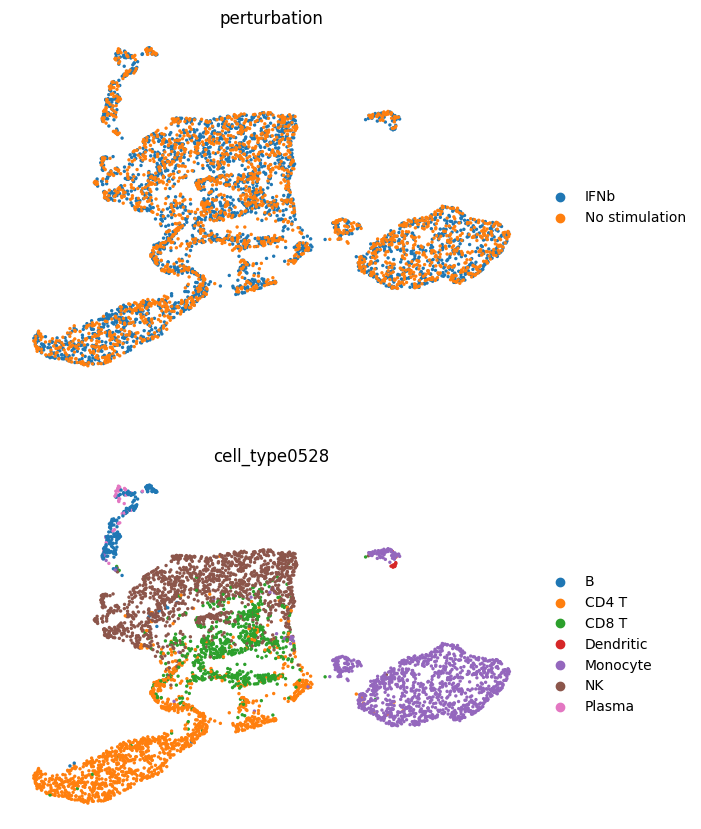

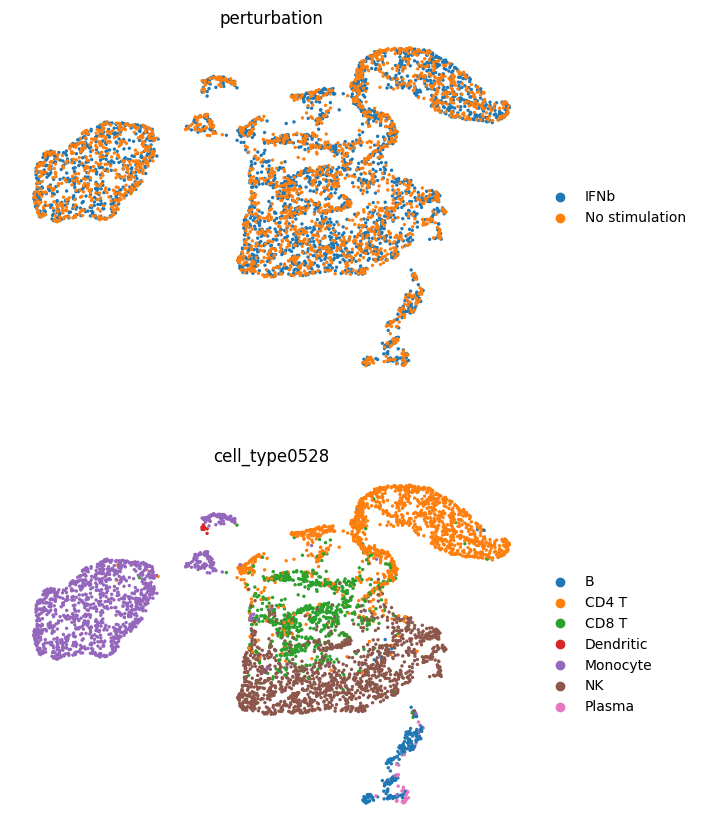

In [17]:
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['perturbation', 'cell_type0528'], frameon=False, ncols=1)

sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['perturbation', 'cell_type0528'], frameon=False, ncols=1)

In [2]:
import scanpy as sc
adata1=sc.read_h5ad("./PBMC_yale/adata.h5ad")
print(1)

import rpy2.robjects as robjects
import os
os.environ["R_HOME"]="/home/xx244/.conda/envs/benchmark/lib/R"
import anndata2ri
anndata2ri.activate()
'''
# Add your library path
library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path

from rpy2.robjects import r
r('.libPaths("/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3")')
robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
# Verify the updated library paths
print(robjects.r('.libPaths()'))

# Set the library path
r('.libPaths("/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3")')

# Verify the updated library paths
print(r('.libPaths()'))
'''
from metrics import calculate_metrics

try:
    calculate_metrics(adata1, batch_key='perturbation', celltype_key='cell_type0528', all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')
except:
    calculate_metrics(adata1, batch_key='perturbation', celltype_key='cell_type0528', all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')

1
R_HOME is already set to: /home/xx244/.conda/envs/benchmark/lib/R


/tmp/ipykernel_2815698/249224484.py:10: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/reproducible/metrics.py:29: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:241: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major rele

LISI---
cLISI, bLISI, LISI_F1 0.9618032897826344 0.8876282776568255 0.923228317916526
ASW---
asw_label 0.5732900947332382
asw_batch 0.8944897191386464
kBET---
0 labels consist of a single batch or is too small. Skip.
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
kbet_score 0.9659843856271946
graph_conn 0.9869679993373943
NMI, ARI ---
NMI 0.6747381141204728
ARI 0.6150893233824573
positive and true positive rate---
                             ASW_label       ARI       NMI   1-cLISI  \
X_effect_modifier_space_PCA    0.57329  0.615089  0.674738  0.961803   

                                bLISI  ASW_batch  kBET Accept Rate  \
X_effect_modifier_space_PCA  0.887628    0.89449          0.965984   

                             graph connectivit

In [1]:
import os
os.environ['LD_LIBRARY_PATH'] = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3:$LD_LIBRARY_PATH"
os.environ['R_HOME']="/home/xx244/.conda/envs/benchmark/lib/R"

# Proceed with importing R libraries using rpy2
from rpy2.robjects import r
r('''
    library(kBET)
    library(lisi)
''')


'lisi','kBET','tools',...,'datasets','methods','base'
